# One Pollution Source, Two Extraction Well Model

This model considers whether the pollution plume from a pollution source located at (-8.5,0) on the xy-plane is contained by two extraction wells at (0,0) and (8.5,0). The location of the source and the wells is held constant, while the strength of the wells and of the pollution source is modified by the user. This model assumes that aside from the pollution source, a constant stream of water flows through the xy-plane; it further assumes that flow is two-dimensional.

In [2]:
#This cell imports Python code libraries in order to execute the notebook
%matplotlib inline
import matplotlib.pyplot as plt #for making figures
plt.style.use('seaborn-white')
import numpy as np #arrays
import cmath as cm #complex mathematics
import sympy as sy #solving equations
from sympy import symbols, Eq, solve

In the following cell, the user can change the strength of the wells and of the pollution source relative to one another. The values of the strengths should all be positive numbers less than 15.

In [5]:
sourcestr = 4 #strength of the pollution source at (-8.5,0)
sink1str = 1 #strength of the extraction well at (0,0)
sink2str = 4 #strength of the extraction well at (8.5,0)

The following cell produces three graphs showing the streamlines of the flow (in black) as well as the boundaries (in green) of the flow produced by the pollution source, the flow captured by the first well, and the flow captured by the second well.

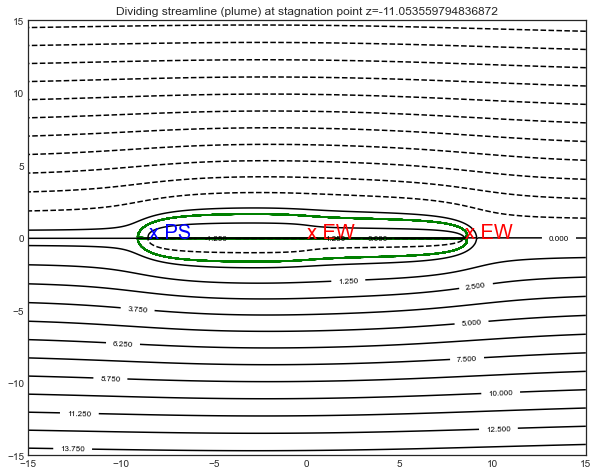

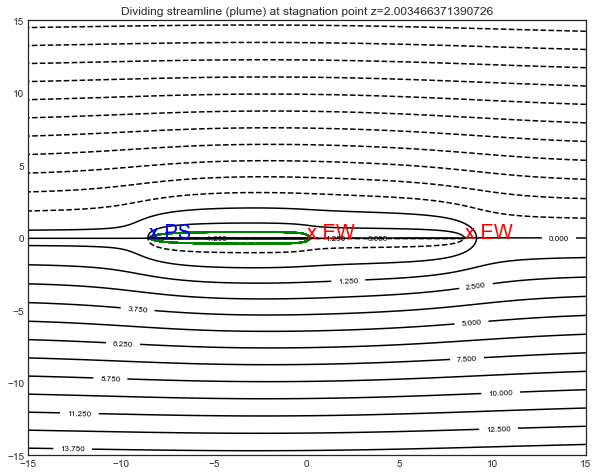

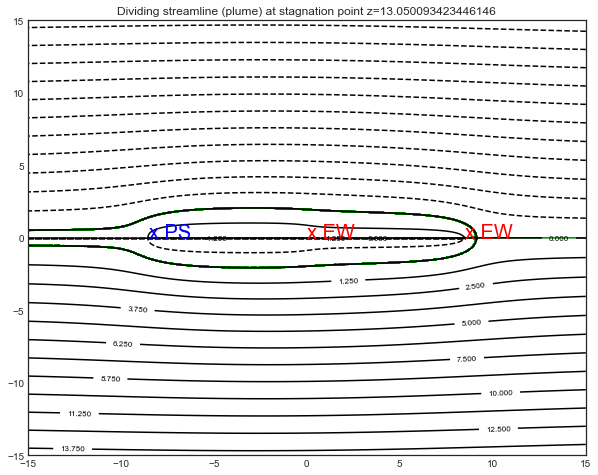

In [10]:
k = sy.Symbol('k') #variable used to find stagnation points (places where the complex velocity equals 0)
eq1 = Eq(1+(sourcestr/(k+8.5))+(-sink2str/(k))+(-sink2str/(k-8.5)),0) #the complex velocity equation
sol = solve(eq1) #solving for k
limit = 10**(-5) #error tolerance variable for how far off the real axis the root can get
for x in sol:
    if abs(sy.im(x))<=limit: #only makes graphs for roots that are within error tolerance
        x1 = float(sy.re(x)) #the real part of the root - we ignore imaginary part
        #substituting the root into the streamline equation to find the boundary value
        b = 0 #uniform flow, aka y-component; equals 0 for the root by definition
        b = b+(-sourcestr/(2*np.pi))*np.arctan2(0,(x1+8.5)) #source flow for root value
        b = b+ (sink1str/(2*np.pi))*np.arctan2(0,x1) #sink at (0,0) flow for root value
        b = b+ (sink2str/(2*np.pi))*np.arctan2(0,(x1-8.5)) #sink at (8.5,0) flow for root value
        plt.figure(figsize=(10,8))
        x = np.linspace(-15, 15, 250)
        y = np.linspace(-15, 15, 250)
        ypos = np.linspace(0, 15, 250)
        yneg = np.linspace(-15,0,250)
        plt.title('Dividing streamline (plume) at stagnation point z='+repr(x1))
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        X, Ypos = np.meshgrid(x, ypos)
        X, Yneg = np.meshgrid(x, yneg)
        #contours are calculated and graphed in two halves, above and below x-axis
        #positive side
        Zpos = -Ypos #uniform flow
        Zpos = Zpos+(-sourcestr/(2*np.pi))*np.arctan2(Ypos,(X+8.5)) #source at (-8.5,0)
        plt.text(-8.5,0,'x PS',color='b',size=20)
        Zpos = Zpos+ (sink1str/(2*np.pi))*np.arctan2(Ypos,X) #sink at (0,0)
        plt.text(0,0,'x EW',color='r',size=20)
        Zpos = Zpos+ (sink2str/(2*np.pi))*np.arctan2(Ypos,(X-8.5)) #sink at (8.5,0)
        plt.text(8.5,0,'x EW',color='r',size=20)
        #negative side
        Zneg = -Yneg #uniform flow
        Zneg = Zneg+(-sourcestr/(2*np.pi))*np.arctan2(Yneg,(X+8.5)) #source at (-8.5,0)
        Zneg = Zneg+ (sink1str/(2*np.pi))*np.arctan2(Yneg,X) #sink at (0,0)
        Zneg = Zneg+ (sink2str/(2*np.pi))*np.arctan2(Yneg,(X-8.5)) #sink at (8.5,0)
        #graph boundary
        contours=plt.contour(X, Yneg, Zneg, levels=np.linspace(-(b+0.01),-b,100), colors='green');
        contours=plt.contour(X, Ypos, Zpos, levels=np.linspace(b,(b+0.01),100), colors='green');
        #graph other contours
        contours=plt.contour(X, Ypos, Zpos, levels=np.linspace(-15,15,25), colors='black');
        contours=plt.contour(X, Yneg, Zneg, levels=np.linspace(-15,15,25), colors='black');
        plt.clabel(contours, inline=True, fontsize=8)